<a href="https://colab.research.google.com/github/harshil1030/Car_Price_Pridiction_Model/blob/main/DataAnalyticsPR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical - 2
CDA


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/PC_Export_2016_2017.csv")

In [9]:
df

,pc_code,pc_description,unit,country_code,country_name,quantity,value
0,99,Other Commodities,Na,599,Unspecified,NaN,270.889542
1,99,Other Commodities,Na,1213,Kenya,NaN,17.159452
2,99,Other Commodities,Na,1395,Tanzania Rep,NaN,8.896539
3,99,Other Commodities,Na,1417,Uganda,NaN,5.181412
4,99,Other Commodities,Na,2035,Benin,NaN,2.476015
...,...,...,...,...,...,...,...
20839,S6,Petroleum Products,Ton,15430,Uzbekistan,2.0,0.001904
20840,S6,Petroleum Products,Ton,16095,Cyprus,36194.0,20.474253
20841,S6,Petroleum Products,Ton,16151,Gibraltar,2920254.0,1285.651148
20842,S6,Petroleum Products,Ton,16251,Malta,68267.0,24.206703


In [10]:
df.shape  #7 rows and 20844 cols 

(20844, 7)

In [39]:
df.info()
name = "Harshil"
print(f"hellomy name is {name}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20844 entries, 0 to 20843
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pc_code         20844 non-null  object 
 1   pc_description  20844 non-null  object 
 2   unit            20844 non-null  object 
 3   country_code    20844 non-null  int64  
 4   country_name    20844 non-null  object 
 5   quantity        10065 non-null  float64
 6   value           20844 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB
hellomy name is Harshil


In [12]:
df.describe()

,country_code,quantity,value
count,20844.000000,1.006500e+04,20844.000000
mean,9053.099645,3.903794e+06,13.267463
std,4495.312603,7.484555e+07,136.903421
min,2.000000,0.000000e+00,0.000000
25%,4365.000000,1.360000e+02,0.024924
50%,10179.000000,5.175000e+03,0.299185
75%,13101.000000,1.690850e+05,2.788682
max,16409.000000,5.710303e+09,9599.857922


Mean of Exported Quantity

In [13]:
x1=df["quantity"].mean()
x1

3903794.277496274

In [14]:
mean=df.mean()
mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


country_code    9.053100e+03
quantity        3.903794e+06
value           1.326746e+01
dtype: float64

In [15]:
#df.style.format({'quantity':'{:,5f}'.format,'value':'{:,.3f}'.format})
#df
#used to remove last decimals in the specific cols 

In [16]:
median=df.median(axis=0,skipna=True) #axis=0 means rows
median

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


country_code    10179.000000
quantity         5175.000000
value               0.299185
dtype: float64

In [17]:
mode=df.mode()
mode

,pc_code,pc_description,unit,country_code,country_name,quantity,value
0,99,"Drug Formulations, Biologicals",Na,5423.0,U S A,0.0,0.00001
1,H8,Other Commodities,NaN,NaN,NaN,NaN,NaN


Creating New Dataframe for the Hiostogram Preparation

In [18]:
df1=pd.DataFrame(df)


In [19]:
df2=df1.dropna()  ## Dropping all the null values in the Following Dataset 
df2

,pc_code,pc_description,unit,country_code,country_name,quantity,value
209,A1,Tea,Kgs,599,Unspecified,15000.0,0.110679
210,A1,Tea,Kgs,1213,Kenya,1115410.0,2.216985
211,A1,Tea,Kgs,1395,Tanzania Rep,3959.0,0.017712
212,A1,Tea,Kgs,1417,Uganda,683.0,0.002199
213,A1,Tea,Kgs,2035,Benin,70041.0,0.323173
...,...,...,...,...,...,...,...
20839,S6,Petroleum Products,Ton,15430,Uzbekistan,2.0,0.001904
20840,S6,Petroleum Products,Ton,16095,Cyprus,36194.0,20.474253
20841,S6,Petroleum Products,Ton,16151,Gibraltar,2920254.0,1285.651148
20842,S6,Petroleum Products,Ton,16251,Malta,68267.0,24.206703


In [20]:
df2.describe()

,country_code,quantity,value
count,10065.000000,1.006500e+04,10065.000000
mean,9105.736513,3.903794e+06,14.043209
std,4467.240484,7.484555e+07,119.876005
min,2.000000,0.000000e+00,0.000000
25%,4381.000000,1.360000e+02,0.020275
50%,10189.000000,5.175000e+03,0.261256
75%,13101.000000,1.690850e+05,2.786516
max,16409.000000,5.710303e+09,5352.101600


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10065 entries, 209 to 20843
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pc_code         10065 non-null  object 
 1   pc_description  10065 non-null  object 
 2   unit            10065 non-null  object 
 3   country_code    10065 non-null  int64  
 4   country_name    10065 non-null  object 
 5   quantity        10065 non-null  float64
 6   value           10065 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 629.1+ KB


In [22]:
rows = len(df2.axes[0]) # No of rows in the Dataframe
rows

10065

In [23]:
cols = len(df2.axes[1]) #No of Cols in Dataframe 
cols 

7

In [24]:
frame=df2['quantity']
frame 

209        15000.0
210      1115410.0
211         3959.0
212          683.0
213        70041.0
           ...    
20839          2.0
20840      36194.0
20841    2920254.0
20842      68267.0
20843    2832785.0
Name: quantity, Length: 10065, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ab3920910>]],
      dtype=object)

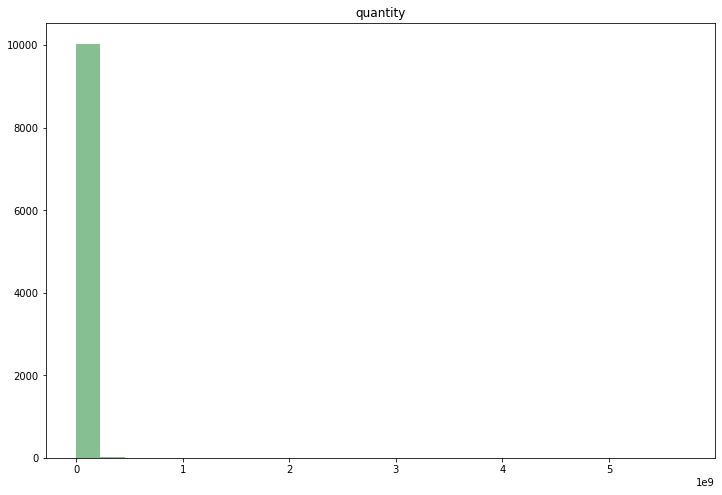

In [25]:
ax = df2.hist(column='quantity', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2)
ax

Variance

In [26]:
n=len(frame)



In [27]:
meean=sum(frame)/n
meean

3903794.277496274

In [28]:
deviations=[(x - meean) ** 2 for x in frame]
variance=sum(deviations)/n
variance

5601299140736364.0

Standard Deviantion


In [29]:
std_dev = variance ** 0.5
std_dev

74841827.48127122

In [30]:
# skewness along the index axis
df.skew(axis = 0, skipna = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


country_code    -0.194210
quantity        58.650350
value           39.811792
dtype: float64

Mode

In [31]:
print(statistics.mode(frame))

0.0


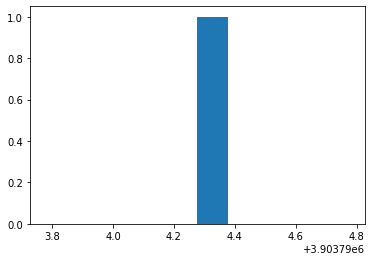

In [32]:
plt.hist(meean)
plt.show()

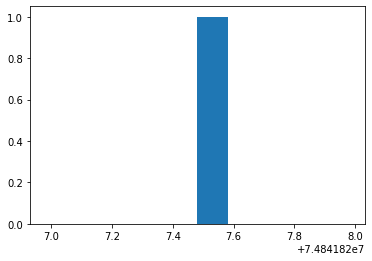

In [33]:
plt.hist(std_dev)
plt.show()

In [34]:
plt.hist(modef)
plt.show()

NameError: ignored

In [ ]:
plt.bar(['k','s'],[frame.kurtosis(),frame.skew()])
plt.show()

